# Data Visualisation

Data visualisation is one of the most powerful tools for a data scientist (or more generally anyone analysing data). Not only does it allow us to quickly understand our data through identifying patterns, trends, outliers etc, it allows us to transform that data into a narrative to communicate our (sometimes complex) narrative to both technical and non-technical audiences.

<iframe src="https://ourworldindata.org/grapher/per-capita-energy-use?tab=map" loading="lazy" style="width: 100%; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>

## Matplotlib.pyplot
Matplotlib is one of the most widely used Python libraries for data visualization. It offers a comprehensive and flexible system for creating static, animated, and interactive plots.

Lets go ahead and import matplotlib, specifically the pyplot submodule.


In [1]:
import matplotlib.pyplot as plt    
import numpy as np

%matplotlib inline
# Any guesses as to what the line above does?   


Matplotlib is object-orientated. Some of the basic components (or objects) of Matplotlib are:
- **Figure**: The entire window or page where the plot appears. It can contain one or more subplots
- **Axes** (subplot): The area where the data is plotted, which includes labels, ticks, lines and grids.
- **Plotting functions**: A wide range of functions to plot different kinds of data e.g. plot(), bar(), scatter().

### Now, let's create a very simple plot to get the point across  
You can access the plotting functions directly from the pyplot module itself, this is often the quickest way to plot and explore data.

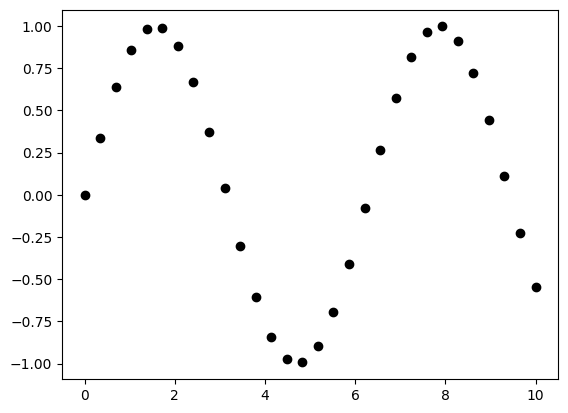

In [2]:
# Create your x and y data using the Numpy library

x1 = np.linspace(0, 10, 30)
y1 = np.sin(x1)                         

plt.plot(x1, y1, 'o', color='black');         # There are many ways of coding in black as a colour

There are many ways to customise plots (and many to achieve the same outcome, e.g. the shortcut string used below)

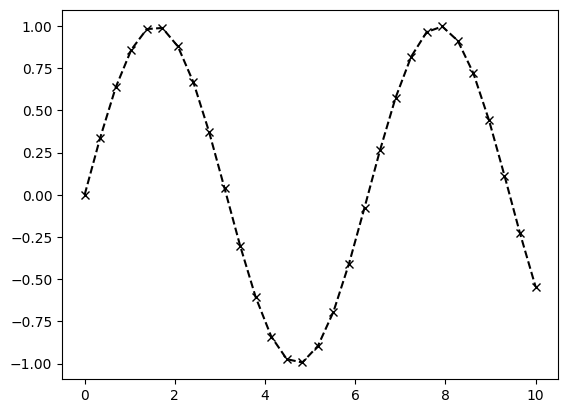

In [3]:
# For instance:
plt.plot(x1, y1, '--xk');


You can also change the entire style of plotting at a module level

In [4]:
# get a list of available styles, pick one and try out in the next cell
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


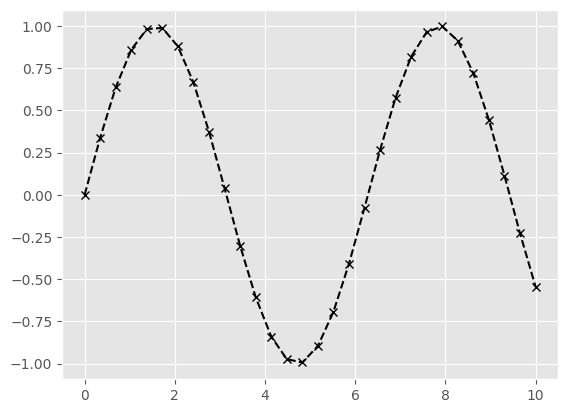

In [5]:
plt.style.use('ggplot') 

plt.plot(x1, y1, '--xk');

### Let's now create some random data for plotting in the following examples. Your plots should all look different from those of your peers. Your job is to comment on the code below

&nbsp;

### Now go ahead and make the following additions to the plot above:
&nbsp;

1. Add axis labels. Try to choose appropriate ones assuming that the plot represents energy data
2. Choose a different colour scheme
3. Try changing the x and y axis ranges
4. Increase the size of your plot to take up roughly the width of the screen
5. Add an appropriate label to your colourbar (`colorbar`) and rotate 270 degrees

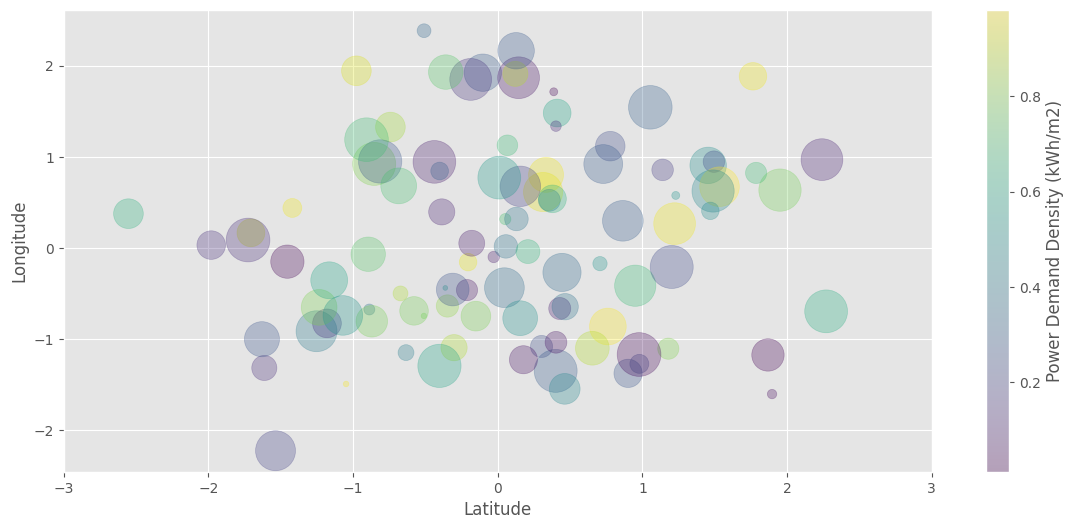

In [6]:
rng = np.random.RandomState(0) # Define the state for the random number generation                 
x2 = rng.randn(100) #Generate 100 numbers with a standard normal distributio
y2 = rng.randn(100)
colors = rng.rand(100) # Uniform distributuion
sizes = 1000 * rng.rand(100)

plt.figure(figsize = (14,6))
plt.scatter(x2, y2, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
cbar = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.xlim([-3, 3])
plt.xlim([-3, 3])
cbar.set_label("Power Demand Density (kWh/m2)")

plt.show()



<details><summary>Click here when instructed</summary>
<p>

#### Here are some sample lines of code that will work. 

```python

#1
plt.xlabel('GDP Growth Index')
plt.ylabel('Energy Acceleration Index')

#2
# You can use many of the schemes such as 'plasma'. Consult the Matplotlib.org website for more options 

#3
plt.xlim(-6,6)                    # Notice how important scaling is in representing your data?
plt.ylim(-6,6)

#4
plt.figure(figsize=(20,10))       # However, this needs to come before you plot the data. Canvas before paint!

#5
cbar = plt.colorbar(); 
cbar.set_label('Normalized population', rotation=270)
```

</p>
</details>



### Using Figures
Using the plt. shortcut is fine for basic data exploration, but how do you refer back to the sin plot you created first. Your latest plots have overridden it. 

As you generate more plots, plots get more complex, or you want to use subplots, it is good practise to use a more formal structure where you assign plots and their axes to variables.

7. Finish of the code below to create a subplot containing the two previous plots.

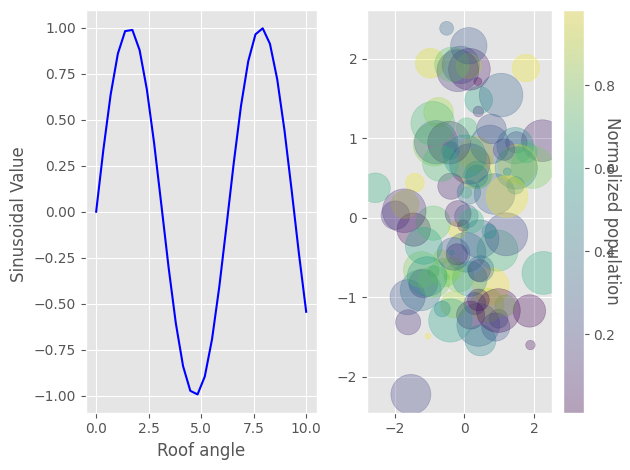

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)  # create a figure containing multiple axes
sn = ax1.plot(x1, y1, color= "b")  # plot sin data as solid blue line 
ax1.set_ylabel("Sinusoidal Value ")  # define a y label
ax1.set_xlabel("Roof angle")  # define an x label
dot = ax2.scatter(x2, y2, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
cbar = fig.colorbar(dot, ax=ax2)
cbar.set_label('Normalized population', rotation=270)
fig.tight_layout()
plt.show()  # plot the figure


<details><summary>Click here when instructed</summary>
<p>

#### Here are some sample lines of code that will work. 

```python

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sn = ax1.plot(x1, y1, '-', color='blue'); 
ax1.set_ylabel('a')
ax1.set_xlabel('b')
dot = ax2.scatter(x2, y2, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
cbar=fig.colorbar(dot, ax=ax2)
cbar.set_label('Normalized population', rotation=270)
fig.tight_layout()
plt.show(fig)
```

</p>
</details>



## Seaborn Activity

Seaborn is a statistical visualisation library built on matplotlib. In many cases, it makes plotting of statistical analysis easier and more attactive without the need for additional lines of code as would be the case if only using matplotlib.

In the code block below, using hourly energy and indoor environmental quality (IEQ) data from Holywell House, use pandas and seaborn to 
1) import separate electricity, gas, IEQ and outdoor temperature data using pandas and concatonate into a single dataframe.
2) Start exploring the data. What is there? Are there any gaps in the data?
3) Resampling the data to daily, think about what aggregation function(s) are appropraite for the different variables. You can apply particular aggregation functions to variables by providing a dictionary {col:func} to the ```resample().agg()``` method.
4) explore relationships between a subset of features of your choosing using [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
5) Looking at electricity and gas, which features show the strongest, if any, correlation? Plot the linear regression for this pair of features with [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)
6) Derive a new feature, day of the week using your datetime index - in machine learning, this is called Feature Engineering. Explore if there are any correlations between day of the week and energy use. You may wish to use the 'hue' parameter of jointplot to condition on this new categorical data or try using the [catplot](https://seaborn.pydata.org/tutorial/categorical.html) function.


In [8]:
# 1) import separate electricity, gas, IEQ and outdoor temperature data using pandas.
import seaborn as sns
import pandas as pd
ieq = pd.read_csv('../Data/HH_level1_IEQ.csv', index_col=0, parse_dates=True) # file: HH_level1_IEQ.csv
outdoor = pd.read_csv('../Data/HH_outside_TH.csv', index_col=0, parse_dates=True) # file: HH_outside_TH.csv
elec = pd.read_csv('../Data/HH_elec.csv', index_col=0, parse_dates=True) # file: HH_elec.csv
gas = pd.read_csv('../Data/HH_gas.csv', index_col=0, parse_dates=True) # file: HH_gas.csv

# concatonate into a single dataframe
combined = pd.concat([ieq, outdoor, elec, gas], axis=1)

In [9]:
# Concatenate the df
combined.head(5)


,CO2,H,LUX,PIR,RAD,T,WIND,pmv,ppd,tr,out_H,out_T,Electricity (kWh),Gas (kWh)
2023-10-06 00:00:00+00:00,505.000000,55.967500,0.0,12.0,20.243333,20.648333,0.0,-0.800730,18.518672,20.003440,89.31925,14.00175,NaN,0.0
2023-10-06 01:00:00+00:00,496.083333,56.142500,0.0,12.0,20.174167,20.573333,0.0,-0.818975,19.147120,19.938431,88.84100,13.95500,3.823,0.0
2023-10-06 02:00:00+00:00,485.916667,56.200000,0.0,12.0,20.109167,20.508333,0.0,-0.836247,19.754275,19.873278,89.61550,13.60450,3.769,0.0
2023-10-06 03:00:00+00:00,477.166667,56.214167,0.0,12.0,20.014167,20.431667,0.0,-0.860447,20.627854,19.764396,89.88200,13.53050,3.875,0.0
2023-10-06 04:00:00+00:00,474.500000,56.405000,0.0,12.0,19.907500,20.319167,0.0,-0.888752,21.677757,19.661826,90.20875,13.26900,3.951,0.0


In [10]:
combined.columns

Index(['CO2', 'H', 'LUX', 'PIR', 'RAD', 'T', 'WIND', 'pmv', 'ppd', 'tr',
       'out_H', 'out_T', 'Electricity (kWh)', 'Gas (kWh)'],
      dtype='object')

In [11]:
# 3) Resampling the data to daily
combined_resampled = combined.resample('1d').agg({
    "CO2":"max",
    "H": "mean",
    "PIR": "sum",
    "T": "mean",
    "Electricity (kWh)": "sum",
    "Gas (kWh)": "sum",
    "out_H": "mean",
    "out_T": "mean"
    })

In [12]:
# check the data was resampled correctly
combined_resampled.head()

,CO2,H,PIR,T,Electricity (kWh),Gas (kWh),out_H,out_T
2023-10-06 00:00:00+00:00,743.500000,56.993646,354.0,21.661493,142.790,0.0,85.515774,16.210497
2023-10-07 00:00:00+00:00,499.250000,58.372292,288.0,22.145382,103.968,0.0,80.761556,17.591889
2023-10-08 00:00:00+00:00,476.166667,55.763681,288.0,22.149861,103.688,0.0,81.558465,16.478035
2023-10-09 00:00:00+00:00,965.916667,57.768785,1005.0,22.487257,178.297,0.0,85.716986,16.438219
2023-10-10 00:00:00+00:00,875.750000,57.227427,890.0,22.449040,179.400,0.0,90.290861,15.223528


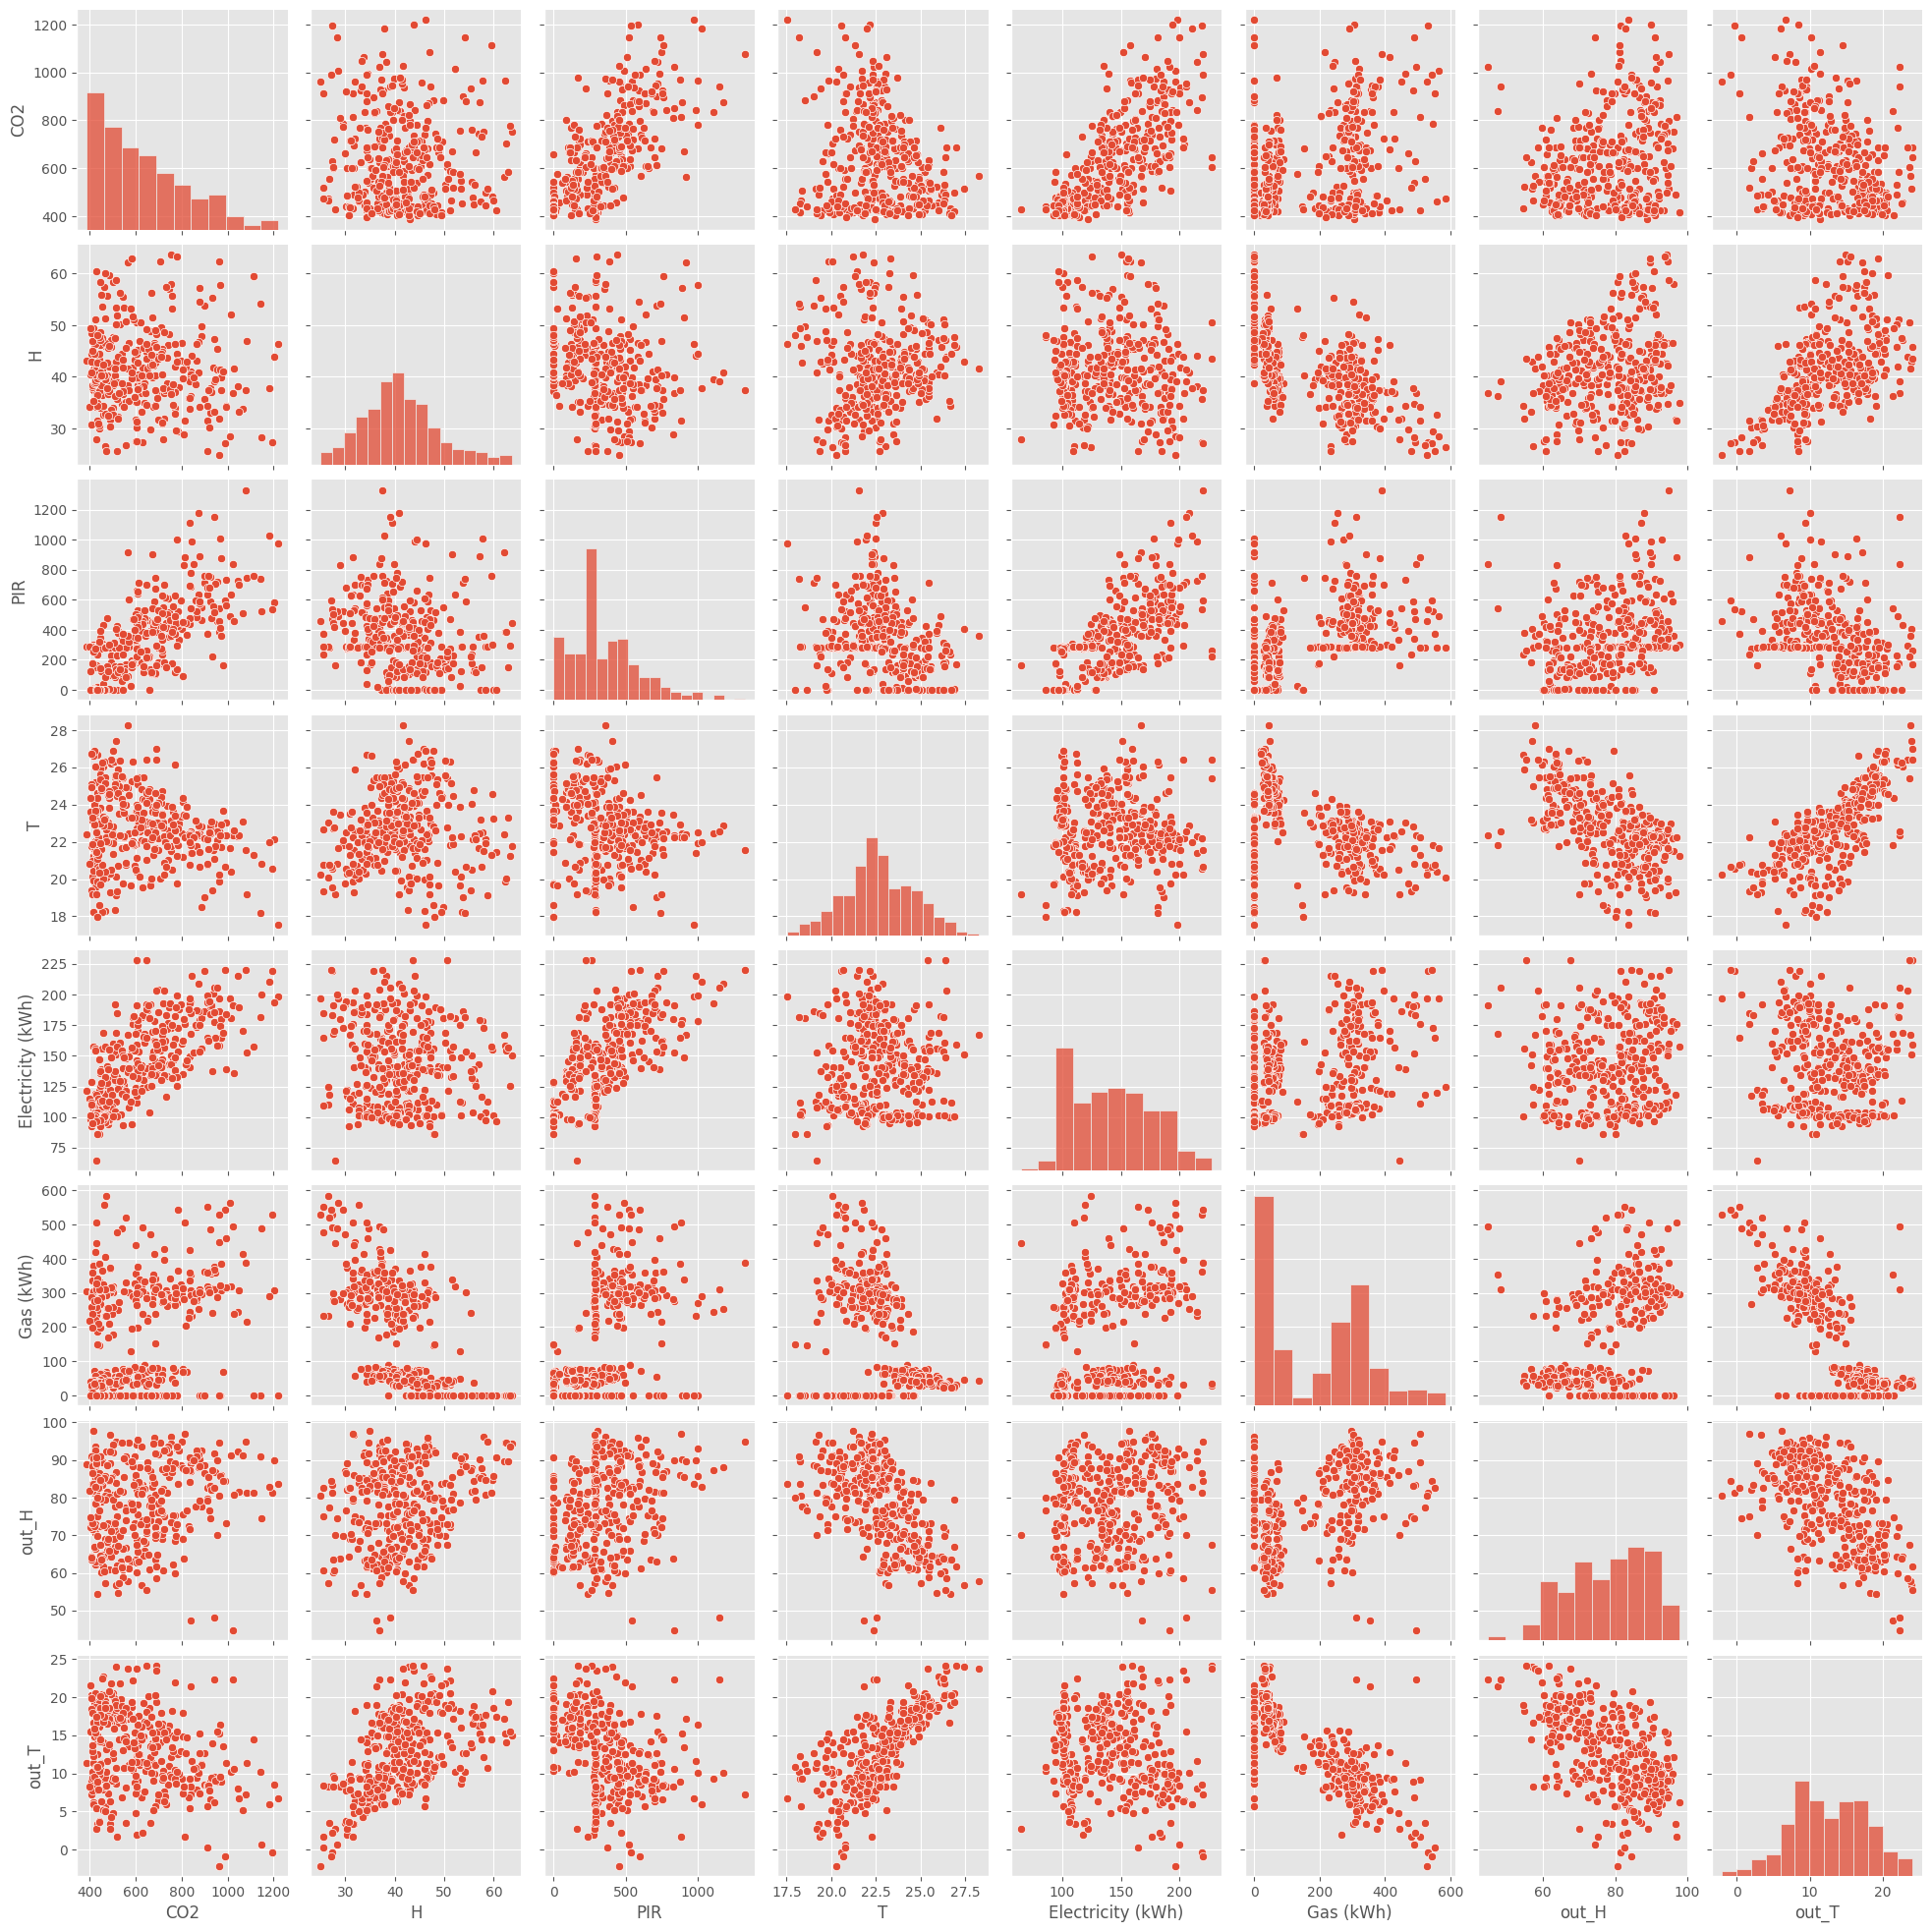

In [13]:
# 4) Using seaborn, create a pairplot of the resampled data to explore relationships between variables.
sns.pairplot(combined_resampled)

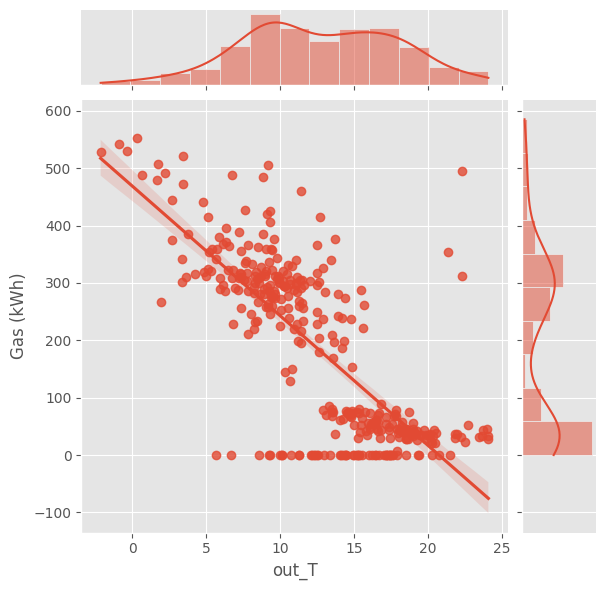

In [14]:
# 5) Using seaborn, create a jointplot of two variables that show a correlation.
sns.jointplot(combined_resampled, x='out_T', y='Gas (kWh)', kind='reg')

# Check catplot

In [15]:
# 6) Add a day of week column to the resampled dataframe and use seaborn to explore any correlations between day of week and energy use.
cr2 = combined_resampled.copy()
cr2["day_of_week"] = combined_resampled.index.dayofweek

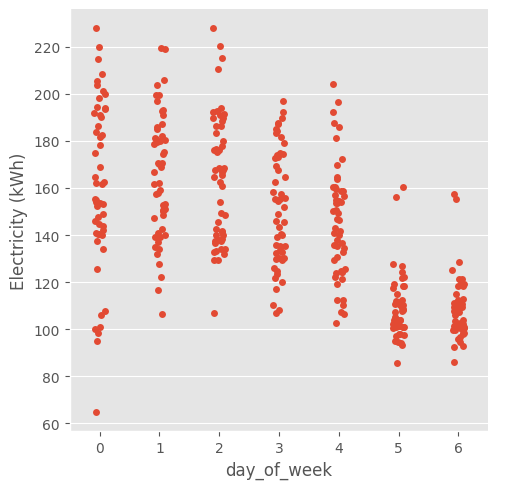

In [16]:
sns.catplot(cr2, x='day_of_week', y='Electricity (kWh)')

## Plotly
While matplotlib is the python standard for creating static plots for analysis and publication, Plotly offers a powerful alternative when you need interactive, web-ready visualizations - an increasingly used tool for communicating your work ([OurWorldInData](https://ourworldindata.org/) is a fantastic example of this). 

Plotly automatically generates interactive plots that allow users to zoom, pan, hover for details, and toggle data series on/off - features that can transform a static chart into an engaging, exploratory tool.

Plotly figures are often rendered in a browser window or in jupyter notebooks. Working with plotly has a similar architecture to matplotlib, however, there are many powerful features that make creating attractive plots very easy. 

Below is an example of plotly using the Holywell House data you imported above. Use the interactive tools to explore the data.

In [17]:
# Create an interactive bar chart with Plotly - bars side by side
import plotly.graph_objects as go

# Create a single subplot (no secondary y-axis for true side-by-side bars)
fig = go.Figure()

# Add electricity consumption as bars
fig.add_trace(
    go.Bar(
        x=combined_resampled.index,
        y=combined_resampled['Electricity (kWh)'],
        name='Electricity (kWh)',
        marker_color='blue',
        opacity=0.7
    )
)

# Add gas consumption as bars
fig.add_trace(
    go.Bar(
        x=combined_resampled.index,
        y=combined_resampled['Gas (kWh)'],
        name='Gas (kWh)',
        marker_color='red',
        opacity=0.7
    )
)

# Update layout
fig.update_layout(
    title="Daily Energy Consumption at Holywell House - Side by Side Bars",
    xaxis_title="Date",
    yaxis_title="Energy Consumption (kWh)",
    hovermode='x unified',
    width=900,
    height=500,
    barmode='group'  # This ensures bars are side by side
)

# Show the interactive plot
fig.show()